In [28]:
import jax.numpy as jnp
import jax
import numpy as np
import cvxpy as cp


def data_generator(n, p, k, seed):
    coef = np.zeros(p)
    np.random.seed(seed)
    coef[np.random.choice(np.arange(p), k, replace=False)] = np.random.choice(
        [1, -1], k
    )
    R = np.zeros((p, p))
    for i in range(p):
        for j in range(i, p):
            R[i, j] = 0.2 ** abs(i - j)
    R = R + R.T - np.identity(p)

    x = np.random.multivariate_normal(mean=np.zeros(p), cov=R, size=(n,))
    y = np.matmul(x, coef) + np.random.randn(n)


    flip_prob = np.random.rand(len(y))
    y[flip_prob < 0.1] = -y[flip_prob < 0.1]

    return coef, (x, y)


def loss_jax(params, data):
    return jnp.sum(-jnp.exp(-jnp.square(data[1] - data[0] @ params) / 20.0))

def loss_cvxpy(params, data):
    return cp.sum(-cp.exp(-cp.square(data[1] - data[0] @ params) / 20.0))

In [21]:
loss_jax(jnp.array([1]), data)

Array(-20.250721, dtype=float32)

<Axes: >

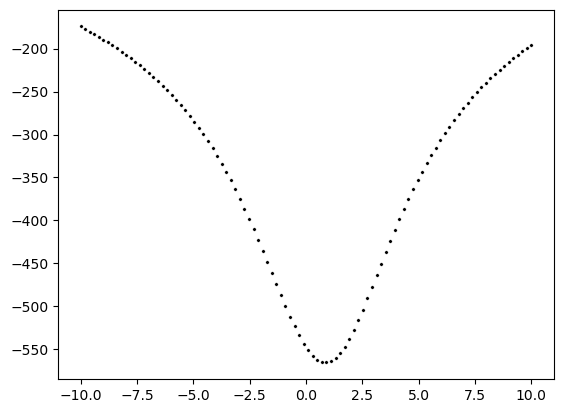

In [35]:
true_params, data = data_generator(600, 1, 1, 0)

x = jnp.linspace(-10, 10, 100)
y = [loss_jax(jnp.array([i]), data).item() for i in x]

sns.scatterplot(x=x , y=y, color='k', s=6)

In [34]:
min(y)

-565.04541015625

[   0.    0. -100.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.  100.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. -100.  100.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. -100.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.]
-512.1986
-512.1985969961914
[ 2.0588987   1.7833627  -1.3978628  -0.27229905  2.053541    1.2730398
 -2.5044453   0.577804   -1.1942459  -2.4877927   2.9129617  -0.89484745
 -1.2296735   0.4069165   0.90643334 -0.74431914 -0.9605942  -3.171163
  0.7238756  -0.3797804   1.6674641  -0.12322025  1.4454556   1.9269925
  0.24505906 -1.3927227   2.3277385   1.998051    0.41475928  0.9787426
 

<Axes: >

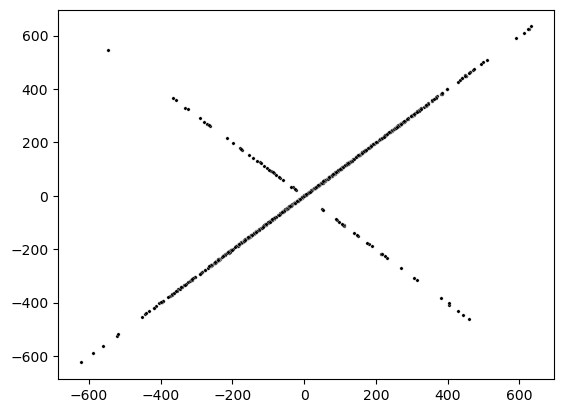

In [14]:
true_params, data = data_generator(600, 100, 5, 0)
print(true_params)
print(loss_jax(jnp.array(true_params), data))
true_params_cvxpy = cp.Variable(len(true_params))
true_params_cvxpy.value = true_params
print(loss_cvxpy(true_params_cvxpy, data).value)

print(jax.grad(loss_jax)(jnp.array(true_params), data))


import seaborn as sns
sns.scatterplot(x=data[0] @ true_params, y=data[1], color='k', s=6)